# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [9]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common()

[('', 906932),
 ('the', 285706),
 ('.', 262261),
 ('and', 147969),
 ('a', 137678),
 ('of', 126985),
 ('to', 110033),
 ('is', 94220),
 ('in', 82978),
 ('br', 80944),
 ('it', 78983),
 ('i', 66714),
 ('that', 58722),
 ('this', 57743),
 ('s', 55617),
 ('as', 43341),
 ('with', 38368),
 ('for', 37064),
 ('was', 36129),
 ('film', 34465),
 ('but', 34162),
 ('movie', 31032),
 ('his', 28348),
 ('on', 27973),
 ('you', 27135),
 ('he', 26868),
 ('are', 24361),
 ('not', 23457),
 ('t', 22570),
 ('one', 22541),
 ('have', 20772),
 ('be', 20487),
 ('by', 19846),
 ('all', 19684),
 ('who', 18983),
 ('an', 18545),
 ('at', 18498),
 ('from', 17803),
 ('her', 17786),
 ('they', 16321),
 ('has', 15195),
 ('so', 15016),
 ('like', 14831),
 ('about', 13681),
 ('very', 13671),
 ('out', 13381),
 ('there', 13282),
 ('she', 13215),
 ('what', 12680),
 ('or', 12654),
 ('good', 12578),
 ('more', 12394),
 ('when', 12285),
 ('some', 12275),
 ('if', 11941),
 ('just', 11764),
 ('can', 11492),
 ('story', 11245),
 ('time', 107

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [21]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [22]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

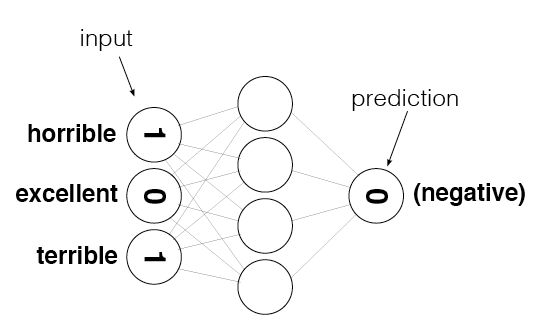

In [12]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

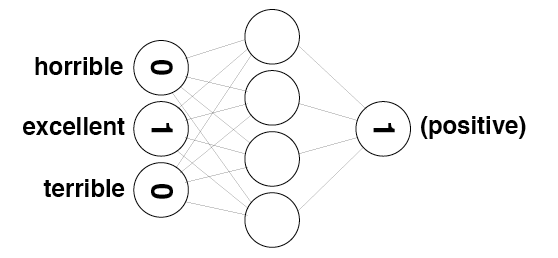

In [13]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [14]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [75]:
list(vocab)

['',
 'inhabitants',
 'goku',
 'stunts',
 'catepillar',
 'kristensen',
 'senegal',
 'goddess',
 'distroy',
 'unexplainably',
 'concoctions',
 'petite',
 'scribe',
 'stevson',
 'sctv',
 'soundscape',
 'rana',
 'metamorphose',
 'immortalizer',
 'henstridge',
 'planning',
 'akiva',
 'plod',
 'eko',
 'orderly',
 'zeleznice',
 'verbose',
 'amplify',
 'resonation',
 'critize',
 'jefferies',
 'mountainbillies',
 'steinbichler',
 'vowel',
 'rafe',
 'bonbons',
 'tulipe',
 'clot',
 'distended',
 'his',
 'impatiently',
 'unfortuntly',
 'lung',
 'scapegoats',
 'muzzle',
 'pscychosexual',
 'outbid',
 'obit',
 'sideshows',
 'jugde',
 'particolare',
 'kevloun',
 'masterful',
 'quartier',
 'unravelling',
 'necessarily',
 'antiques',
 'strutts',
 'tilts',
 'disconcert',
 'dossiers',
 'sorriest',
 'blart',
 'iberia',
 'situations',
 'frmann',
 'daniell',
 'rays',
 'pried',
 'khoobsurat',
 'leavitt',
 'caiano',
 'sagan',
 'attractiveness',
 'kitaparaporn',
 'hamilton',
 'massages',
 'reasonably',
 'horga

In [15]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

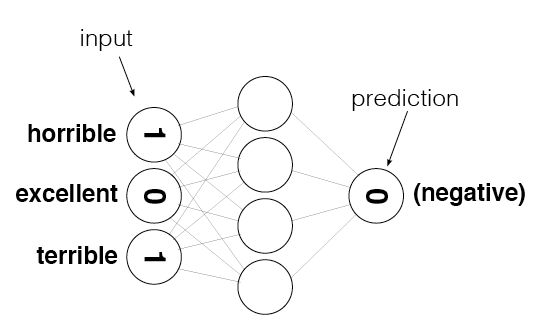

In [16]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [17]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'irresponsibility': 1,
 'outhouse': 2,
 'stranded': 3,
 'himmelen': 4,
 'sphincters': 5,
 'mussolini': 6,
 'inters': 7,
 'ambiguities': 8,
 'fondly': 9,
 'mayhem': 10,
 'exoticism': 11,
 'idol': 12,
 'patches': 13,
 'meked': 14,
 'goodspeed': 15,
 'bigot': 16,
 'wha': 17,
 'akiva': 18,
 'educating': 19,
 'darkie': 20,
 'justina': 21,
 'lazarous': 22,
 'iek': 23,
 'costello': 24,
 'fxs': 25,
 'fizzly': 26,
 'ubasti': 27,
 'videostore': 28,
 'grandfatherly': 29,
 'reissued': 30,
 'fables': 31,
 'zano': 32,
 'uninviting': 33,
 'stereophonics': 34,
 'diavalo': 35,
 'africa': 36,
 'fando': 37,
 'promulgated': 38,
 'evel': 39,
 'lizard': 40,
 'mackintosh': 41,
 'moviemaking': 42,
 'incoherrent': 43,
 'psychotics': 44,
 'belated': 45,
 'compleat': 46,
 'naturalist': 47,
 'lahr': 48,
 'condorwhich': 49,
 'fernanda': 50,
 'beatific': 51,
 'resignation': 52,
 'youngstersand': 53,
 'courier': 54,
 'delete': 55,
 'haji': 56,
 'hunched': 57,
 'cosima': 58,
 'unrecognisable': 59,
 'ficker':

In [49]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [33]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [51]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [54]:
labels[0]

'POSITIVE'

In [52]:
get_target_for_label(labels[0])

1

In [55]:
labels[1]

'NEGATIVE'

In [53]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [86]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [87]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [61]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):587.5% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [62]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):89.58 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):95.03 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:27.4% Speed(reviews/sec):95.46 #Correct:3295 #Trained:6592 Training Accuracy:49.9%

KeyboardInterrupt: 

In [63]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [64]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):96.39 #Correct:1247 #Trained:2501 Training Accuracy:49.8%
Progress:20.8% Speed(reviews/sec):99.31 #Correct:2497 #Trained:5001 Training Accuracy:49.9%
Progress:22.8% Speed(reviews/sec):99.02 #Correct:2735 #Trained:5476 Training Accuracy:49.9%

KeyboardInterrupt: 

In [65]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [66]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):98.77 #Correct:1267 #Trained:2501 Training Accuracy:50.6%
Progress:20.8% Speed(reviews/sec):98.79 #Correct:2640 #Trained:5001 Training Accuracy:52.7%
Progress:31.2% Speed(reviews/sec):98.58 #Correct:4109 #Trained:7501 Training Accuracy:54.7%
Progress:41.6% Speed(reviews/sec):93.78 #Correct:5638 #Trained:10001 Training Accuracy:56.3%
Progress:52.0% Speed(reviews/sec):91.76 #Correct:7246 #Trained:12501 Training Accuracy:57.9%
Progress:62.5% Speed(reviews/sec):92.42 #Correct:8841 #Trained:15001 Training Accuracy:58.9%
Progress:69.4% Speed(reviews/sec):92.58 #Correct:9934 #Trained:16668 Training Accuracy:59.5%

KeyboardInterrupt: 

# Understanding Neural Noise

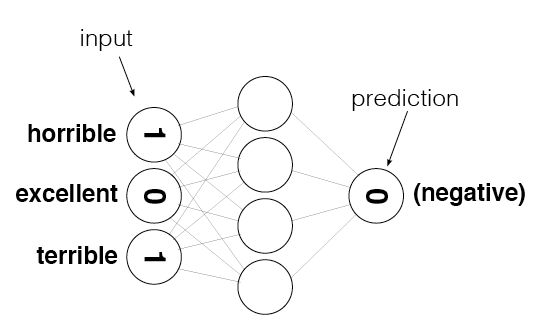

In [18]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [70]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [71]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [79]:
review_counter = Counter()

In [80]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [81]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('i', 5),
 ('high', 5),
 ('is', 4),
 ('of', 4),
 ('a', 4),
 ('bromwell', 4),
 ('teachers', 4),
 ('that', 4),
 ('their', 2),
 ('my', 2),
 ('at', 2),
 ('as', 2),
 ('me', 2),
 ('in', 2),
 ('students', 2),
 ('it', 2),
 ('student', 2),
 ('school', 2),
 ('through', 1),
 ('insightful', 1),
 ('ran', 1),
 ('years', 1),
 ('here', 1),
 ('episode', 1),
 ('reality', 1),
 ('what', 1),
 ('far', 1),
 ('t', 1),
 ('saw', 1),
 ('s', 1),
 ('repeatedly', 1),
 ('isn', 1),
 ('closer', 1),
 ('and', 1),
 ('fetched', 1),
 ('remind', 1),
 ('can', 1),
 ('welcome', 1),
 ('line', 1),
 ('your', 1),
 ('survive', 1),
 ('teaching', 1),
 ('satire', 1),
 ('classic', 1),
 ('who', 1),
 ('age', 1),
 ('knew', 1),
 ('schools', 1),
 ('inspector', 1),
 ('comedy', 1),
 ('down', 1),
 ('about', 1),
 ('pity', 1),
 ('m', 1),
 ('all', 1),
 ('adults', 1),
 ('see', 1),
 ('think', 1),
 ('situation', 1),
 ('time', 1),
 ('pomp', 1),
 ('lead', 1),
 ('other', 1),
 ('much', 1),
 ('many', 1),
 

# Project 4: Reducing noise in our data

In [19]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [20]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [21]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):155.2 #Correct:1812 #Trained:2501 Training Accuracy:72.4%
Progress:20.8% Speed(reviews/sec):167.1 #Correct:3792 #Trained:5001 Training Accuracy:75.8%
Progress:31.2% Speed(reviews/sec):181.3 #Correct:5878 #Trained:7501 Training Accuracy:78.3%
Progress:41.6% Speed(reviews/sec):190.3 #Correct:8009 #Trained:10001 Training Accuracy:80.0%
Progress:52.0% Speed(reviews/sec):195.3 #Correct:10139 #Trained:12501 Training Accuracy:81.1%
Progress:62.5% Speed(reviews/sec):198.8 #Correct:12278 #Trained:15001 Training Accuracy:81.8%
Progress:72.9% Speed(reviews/sec):199.5 #Correct:14396 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):191.1 #Correct:16570 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):185.8 #Correct:18753 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):183.1 #Correct:20075 #Trained:24000 Training 

In [22]:
# test the network
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):928.8% #Correct:851 #Tested:1000 Testing Accuracy:85.1%